# Introduction to Machine Learning
## Lecture 1 - Regression
### Notebook 1: Simple Regression Analysis
Prapared by: Said Bolluk

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Data Preparation

In [3]:
# Load the dataset
data = pd.read_csv("sample_dataset.csv")
data.head()

,X,Y
0,-2.87,-2.8400
1,-2.84,-3.0700
2,-2.79,-0.0895
3,-2.66,-2.0000
4,-2.49,-1.3900


In [7]:
# Define the feature and target sets
X = data["X"].values
y = data["Y"].values

# Reshape the data
X = np.reshape(X, (-1, 1))
y = np.reshape(y, (-1, 1))

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 75
Test size: 25


# REGRESSION

## 1) Linear regression

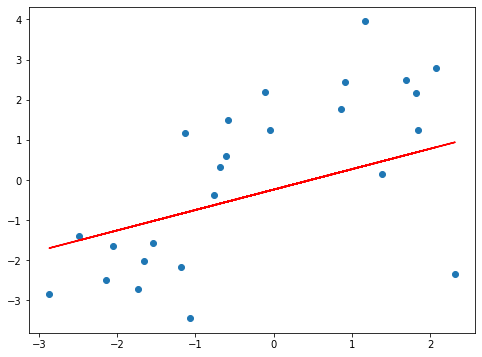

In [4]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
# Train the model over the training set
regressor.fit(X_train, y_train)
# Make prediction
prediction = regressor.predict(X_test)

# Visualize the results on the test set
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), color="red")
plt.show()

Results of the linear regression

In [5]:
# Calculate the metrics needed to evaluate the regression model
# Degree of polynomial: 1
order = 1
bias = np.mean(np.square(y_test-prediction))
variance = np.var(prediction)
error = bias + variance
r2 = regressor.score(X, y)

result_dict = {
    "Polynomial Degree": order,
    "Bias": bias,
    "Variance": variance,
    "Error": error,
    "R2": r2,
}

# Create an empty data frame to combine all the results
results = pd.DataFrame()

# Append the frame with the linear result
results = results.append(result_dict, ignore_index=True, sort=True)

Display the results

In [6]:
results = results[["Polynomial Degree", "Bias", "Variance", "Error", "R2"]]
results.round(4)

,Polynomial Degree,Bias,Variance,Error,R2
0,1.0,3.0066,0.6148,3.6214,0.2617


## 2) Non-linear regression

In [7]:
# Define the feature and target sets
X = data["X"].values
y = data["Y"].values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 75
Test size: 25


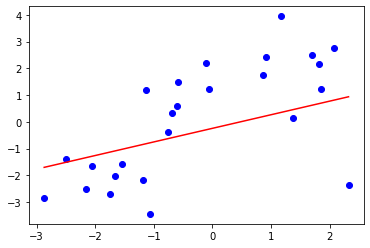

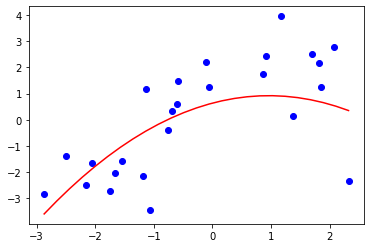

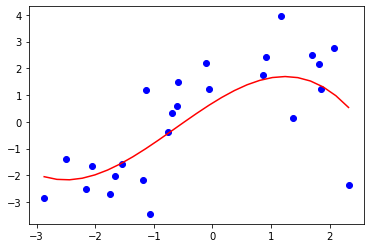

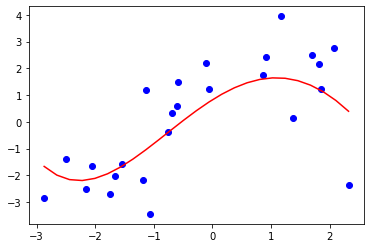

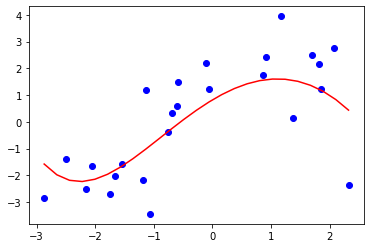

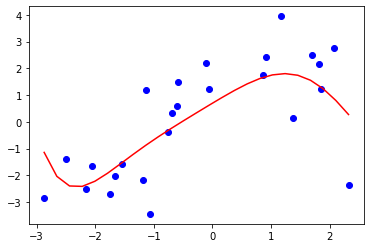

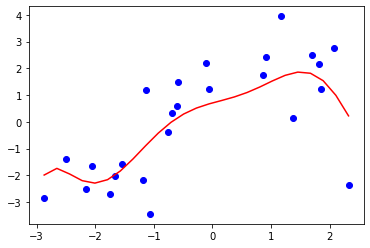

In [8]:
from sklearn.metrics import r2_score

# Reshape the input set 
x_train = np.reshape(X_train, (-1,))
x_test = np.reshape(X_test, (-1,))
y_tr = np.reshape(y_train, (-1,))
y_val = np.reshape(y_test, (-1,))
dots = np.linspace(start=np.min(X_test), stop=np.max(X_test), num=X_test.shape[0])

for n in range(1, 8):
    # Determine the order of the polynomial
    order = n   
    # Train the model
    non_linear = np.poly1d(np.polyfit(X_train, y_train, order))
    
    # Calculate the metrics needed to evaluate the regression models
    # Degree of polynomial: n
    prediction = non_linear(X_test) 
    bias = np.mean(np.square(y_test-prediction))
    variance = np.var(prediction)
    error = bias + variance
    r2 = r2_score(y_test, prediction)

    result_dict = {
        "Polynomial Degree": order,
        "Bias": bias,
        "Variance": variance,
        "Error": error,
        "R2": r2,
    }
    
    # Append the frame with the linear result
    results = results.append(result_dict, ignore_index=True, sort=True)
    
        
    # Visualize results
    plt.figure(figsize=(6, 4))
    plt.scatter(X_test, y_test, color="blue")
    plt.plot(dots, non_linear(dots), color='red')
    plt.show()

Display the final results

In [9]:
results = results[["Polynomial Degree", "Bias", "Variance", "Error", "R2"]]
results.round(4)

,Polynomial Degree,Bias,Variance,Error,R2
0,1.0,3.0066,0.6148,3.6214,0.2617
1,1.0,3.0066,0.6148,3.6214,0.3186
2,2.0,2.2527,1.4800,3.7326,0.4894
3,3.0,1.7210,1.8858,3.6067,0.6100
4,4.0,1.7147,1.8349,3.5495,0.6114
5,5.0,1.7321,1.8200,3.5520,0.6074
6,6.0,1.7684,1.9120,3.6804,0.5992
7,7.0,1.5697,2.0863,3.6560,0.6442


# Model Complexity
Let us analyze the relationship between the bias and variance first, then compare the training and test error according to different degree of polynomials.

## a. Bias vs. Variance

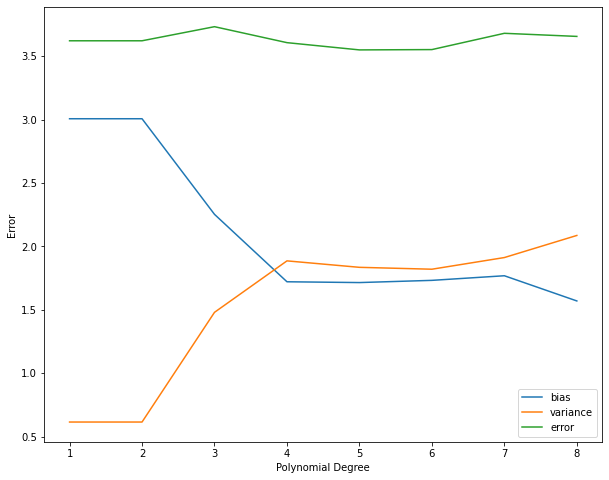

In [10]:
biases = results["Bias"].values
variances = results["Variance"].values
errors = results["Error"]

plt.figure(figsize=(10, 8))
dots = np.arange(1, 9)
plt.plot(dots, biases, label="bias")
plt.plot(dots, variances, label="variance")
plt.plot(dots, errors, label="error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Error")
plt.legend()
plt.show()

## b. Training Error vs. Test Error

Now, let us analyze the error of the training and test sets, and observe the change in the errors of models that are trained with different polynomial degrees.

In [11]:
# Define the feature and target sets
X = data["X"].values
y = data["Y"].values

# Split the data into training and test sets
# This time, let us use 30% of data for testing purposes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 70
Test size: 30


In [12]:
# Create empty lists to collect the errors
training_errors = list()
test_errors = list()

for n in range(1, 15):
    # Determine the order of the polynomial
    order = n   
    # Train the model using training set
    non_linear = np.poly1d(np.polyfit(X_train, y_train, order))
    
    # Training results
    train_pred = non_linear(X_train)
    mse_train = np.mean(np.square(y_train-train_pred))
    training_errors.append(mse_train)
    
    # Test results
    test_pred = non_linear(X_test)
    mse_test = np.mean(np.square(y_test-test_pred))
    test_errors.append(mse_test)

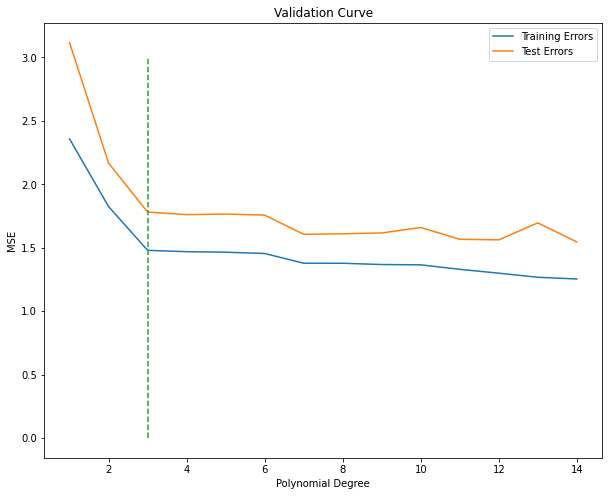

In [13]:
# Visualize results
dots = np.arange(1, 15)
plt.figure(figsize=(10, 8))
plt.plot(dots, training_errors, label="Training Errors")
plt.plot(dots, test_errors, label="Test Errors")
plt.legend()
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Validation Curve")

# Mark the optimal point
a = [3, 3]
b = [0, 3]
plt.plot(a, b, linestyle="--")

plt.show()

From the validation curve above, we can observe that error reduction slows downs after the 3rd degree of polynomial. Also, it is evident that the test errors exhibit fluctations and even increment as we increase the polynomail degree of the regression. Therefore, it can be said that the optimal polynomail degree for this models is three. However, please note that in regression task, it is usually wise to move with the linear regression as it has the highest generalization capacity on new data.  

# END